In [1]:
from QHyper.problems.algorithms.solver_utils import WorkflowSchedulingSolverDecorator, \
    DecomposedWorkflowSchedulingSolver
from QHyper.problems.algorithms.workflow_decomposition import SeriesParallelSplitEnhanced, SeriesParallelSplit, SeriesParallelSplitFinal
from QHyper.problems.workflow_scheduling import Workflow, WorkflowSchedulingOneHot
from QHyper.solvers import Gurobi
from QHyper.problems.algorithms.utils import draw

In [2]:
tasks_file = "/home/marcin/Programming/pegasus-instances/epigenomics/chameleon-cloud/epigenomics-chameleon-hep-1seq-100k-001.json"
machines_file = "workflows_data/machines/linear_smaller_diff.json"
deadline = 856
workflow = Workflow(tasks_file, machines_file, deadline)

(<Figure size 1200x1000 with 1 Axes>, <Axes: >)

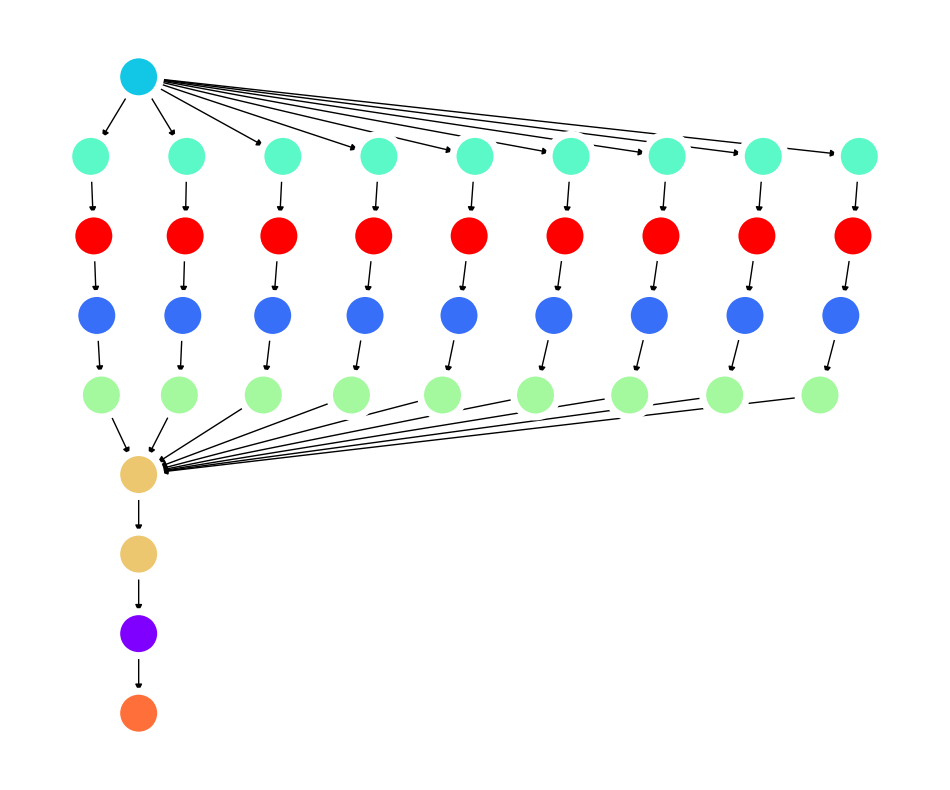

In [16]:
draw(workflow.wf_instance.workflow)

In [17]:
division = SeriesParallelSplitFinal().decompose(workflow, 40)

In [8]:
print(division)

Division(method='SeriesParallelSplitAlgorithm', complete_workflow=<QHyper.problems.workflow_scheduling.Workflow object at 0x7f7aaec31850>, workflows=[<QHyper.problems.workflow_scheduling.Workflow object at 0x7f7aaee1c310>, <QHyper.problems.workflow_scheduling.Workflow object at 0x7f7b0e736b90>])


In [9]:
print(workflow.critical_path_value)

855.9091263268572


In [3]:
def get_decomposed_solver(tasks_file: str, machines_file: str, deadline: int, max_graph_size: int):
    workflow = Workflow(tasks_file, machines_file, deadline)
    division = SeriesParallelSplitFinal().decompose(workflow, max_graph_size)
    problems = map(lambda w: WorkflowSchedulingOneHot(w), division.workflows)
    solvers = map(lambda p: WorkflowSchedulingSolverDecorator(Gurobi(p)), problems)
    return DecomposedWorkflowSchedulingSolver(list(solvers), division)

In [4]:
solver = get_decomposed_solver(tasks_file, machines_file, 856, 40)
schedule = solver.solve()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-12
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 47 rows, 190 columns and 460 nonzeros
Model fingerprint: 0x9f94754e
Variable types: 0 continuous, 190 integer (190 binary)
Coefficient statistics:
  Matrix range     [9e-01, 7e+02]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+02]
Found heuristic solution: objective 9182.3876352
Presolve removed 32 rows and 142 columns
Presolve time: 0.00s
Presolved: 15 rows, 48 columns, 105 nonzeros
Found heuristic solution: objective 8137.7207808
Variable types: 0 continuous, 48 integer (48 binary)

Root relaxation: objective 8.016576e+03, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |

In [22]:
print(schedule)

KeyboardInterrupt: 